# AI Lab — 动手搭建第一个AI项目

在本实验中，我们将从头搭建一个类似于你画我猜的项目，创建简单的工具来识别图纸并输出当前图纸的名称。

你可以先行在演示环境中尝试一番，提前感受下你将完成的项目情况，[点击进入](http://139.219.128.254:8008/)。

![](https://github.com/ddebby/labs/blob/master/pics/1.png?raw=1)

**项目的开发过程包括如下基本步骤：**
> 1. 数据的准备
> 2. 相关配置环境的准备
> 3. 数据预处理
> 4. 模型的选型及设计
> 5. 模型的部署及测试

**在本实验中将用到如下工具和技能：**
- TensorFlow >v1.5.0
- Keras
- TensorFlow.js
- numpy

![](https://github.com/ddebby/labs/blob/master/pics/3.png?raw=1)

## 1. 数据准备

数据集方面，我们使用Google开源的涂鸦数据集：[The Quick, Draw! Dataset](https://github.com/googlecreativelab/quickdraw-dataset)

![](https://github.com/ddebby/labs/blob/master/pics/2.jpg?raw=1)
它共有5000万副涂鸦画，覆盖了345个分类。为了减少实验中的训练时间，我们在本实验中使用了其中的100个常用分类。

每张图像通过如下信息进行定义：

| Key         | Type                    | Description                                                  |
| ----------- | ----------------------- | ------------------------------------------------------------ |
| key_id      | 64-bit unsigned integer | A unique identifier across all   drawings.                   |
| word        | string                  | Category the player was prompted to   draw.                  |
| recognized  | boolean                 | Whether the word was recognized by the   game.               |
| timestamp   | datetime                | When the drawing was created.                                |
| countrycode | string                  | A two letter country code ([ISO 3166-1   alpha-2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2)) of where the player was located. |
| drawing     | string                  | A JSON array representing the vector   drawing               |

比如：

```python
  { 
    "key_id":"5891796615823360",
    "word":"nose",
    "countrycode":"AE",
    "timestamp":"2017-03-01 20:41:36.70725 UTC",
    "recognized":true,
    "drawing":[[[129,128,129,129,130,130,131,132,132,133,133,133,133,...]]]
  }
```

在本实验中，我们使用 `.npy` 存储的数据格式，可以直接使用`numpy`以矩阵的形式加载数据，方便处理。

### 数据下载

In [1]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]


Redirecting output to ‘wget-log’.


In [0]:
!mkdir 'data'
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [3]:
download() 

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

### 查看类别情况
> 相关类名进行了汉化处理

In [26]:
!wget 'https://raw.githubusercontent.com/ddebby/labs/master/class_names.txt'


Redirecting output to ‘wget-log.6’.


In [0]:
f = open("class_names.txt","r")
# And for reading use
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [30]:
classes

['螺丝刀',
 '手表',
 '蝴蝶',
 '刀剑',
 '猫',
 '猎枪',
 '眼睛',
 '棒棒糖',
 '棒球',
 '红绿灯',
 '太阳',
 '钢盔',
 '桥',
 '闹钟',
 '鼓',
 '书',
 '扫帚',
 '风扇',
 '剪刀',
 '云',
 '帐篷',
 '钟表',
 '耳机(头戴)',
 '自行车',
 '停止标志',
 '桌子',
 '甜甜圈',
 '雨伞',
 '笑脸',
 '枕头',
 '床',
 '锯',
 '电灯泡',
 '铁锹',
 '鸟',
 '注射器',
 '咖啡杯',
 '月亮',
 '冰激凌',
 '胡须',
 '手机',
 '短裤',
 '铁砧',
 '收音机',
 '椅子',
 '星星',
 '门',
 '人脸',
 '蘑菇',
 '树',
 '来福枪',
 '相机',
 '闪电',
 '花',
 '篮球',
 '轮子',
 '锤子',
 '帽子',
 '小刀',
 '跳水板',
 '正方形',
 '茶杯',
 '山',
 '苹果',
 '汤匙',
 '钥匙',
 '铅笔',
 '直线',
 '梯子',
 '三角形',
 'T恤',
 '哑铃',
 '麦克风',
 '蛇',
 '短裤',
 '手提箱',
 '笔记本电脑',
 '回形针',
 '彩虹',
 '蜡烛',
 '面包',
 '蜘蛛',
 '信封',
 '圆圈',
 '电源插座',
 '牙齿',
 '热狗',
 '煎锅',
 '长凳',
 '吊扇',
 '网球拍',
 '汽车',
 '胡须',
 '斧子',
 '棒球球棒',
 '披萨',
 '葡萄',
 '眼睛',
 '饼干',
 '飞机']

### 查看文件
所有文件都是以`.npy`的格式存储在 `data`目录下

## 2. 导入基本模块

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [33]:
print(tf.__version__)

1.10.1


In [34]:
print(keras.__version__)

2.1.6-tf


## 3. 加载数据 

每个类别的数据在模型上可用作形状为 [N，784] 的 numpy 数组，其中 N 是该特定类的图像数。
- 使用`np.load()`命令加载每一个*.npy文件，加载完成之后存储为一个[N,784]的矩阵x之中；
- 其中，每个文件的文件名中包含了该类别的信息，将该信息的编号存储为标签y；
- class_name用于存储每个编号对应的真实类别名称

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #初始化相关变量
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #使用numpy载入每个数据问题 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #随机打乱数据顺序
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #切分训练数据和测试数据
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

20%测试数据，80%训练数据，为了提升训练效率，限制每个类别最多加载4000组数据

In [43]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28
print(num_classes)

100


In [44]:
print(len(x_train),len(x_test))

320000 80000


In [45]:
x_train.shape

(320000, 784)

### 随机查看一组数据

diving_board


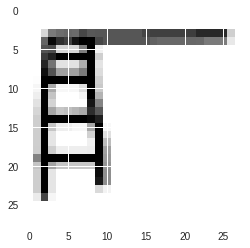

In [48]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

### 数据预处理
- 将图像数据存储格式转化为[28,28,1]的矩阵表示；
- 将标签数据转化为One-hot表示，每个类别使用一个100维的向量描述。
[0,0,0,0,0,0,0,0,....,1,...,0,0,0,0]

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
print(x_train.shape,y_train.shape)

(320000, 28, 28, 1) (320000, 100)


In [55]:
y_train[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [56]:
print(np.argmax(y_train[5]))

70


## 4. 建模
在本部分我们将创建一个简单的 CNN网络，来完成输入图像x到输出y之间的预测。 
- 请注意，参数数量越少，模型越简单越好。 实际上，我们将在浏览器转换后运行模型，并且我们希望让模型快速运行并进行预测。 
- 以下模型包含 3 个CNN层和 2 个全连接层。

In [67]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

- 损失函数方面我们使用了和MNIST分类相同的交叉熵损失函数；
- 对于模型性能的评价我们使用了top-5的评价准则，这符合绘画过程持续输入的预测条件，只有在top-5中有预测目标即判断为正确。

#### Adam优化算法的图示

## 5.训练
我们基于 5 个 epochs 和 256 的batch_size来 训练模型， 30-50s一个epoch，总的训练时间大概在5分钟左右
- epochs的选择和模型的复杂度有关；
- batch_size大小一般和GPU的显存有关；
- 同时，我们从训练集中又抽取了10%作为验证集；

In [68]:
history = model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=1, epochs=5)

Train on 288000 samples, validate on 32000 samples
Epoch 1/5
288000/288000 [==============================] - 21s 73us/step - loss: 1.8814 - top_k_categorical_accuracy: 0.7872 - val_loss: 1.3608 - val_top_k_categorical_accuracy: 0.8798
Epoch 2/5
288000/288000 [==============================] - 20s 70us/step - loss: 1.2311 - top_k_categorical_accuracy: 0.8943 - val_loss: 1.1724 - val_top_k_categorical_accuracy: 0.9022
Epoch 3/5
288000/288000 [==============================] - 20s 68us/step - loss: 1.0781 - top_k_categorical_accuracy: 0.9107 - val_loss: 1.0750 - val_top_k_categorical_accuracy: 0.9101
Epoch 4/5
288000/288000 [==============================] - 20s 68us/step - loss: 0.9937 - top_k_categorical_accuracy: 0.9197 - val_loss: 1.0079 - val_top_k_categorical_accuracy: 0.9179
Epoch 5/5
288000/288000 [==============================] - 20s 68us/step - loss: 0.9339 - top_k_categorical_accuracy: 0.9257 - val_loss: 0.9781 - val_top_k_categorical_accuracy: 0.9217


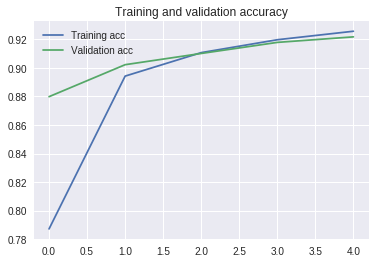

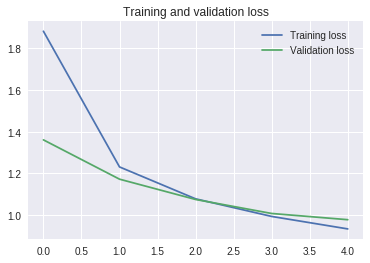

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['top_k_categorical_accuracy']
val_acc = history.history['val_top_k_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc, label='Training acc')
plt.plot(epochs,val_acc, label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 自由发挥时间
- 你可以修改上述epoch次数，调整为10，看是会提升模型的性能 ？通过查看绘制的曲线，你又看到了什么结果？
- 训练误差一直在减小，而验证集不再变化，出现了过拟合现象

## 6. 测试

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 93.02%


## 7. 推理 

['hammer', 'pants', 'shorts', 'rifle', 'helmet']


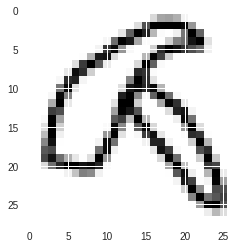

In [66]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

## 8. 模型导出

### 存储标签名称

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

###  安装TensorFlowJS

In [0]:
!pip install tensorflowjs 

    100% |████████████████████████████████| 12.2MB 2.0MB/s 
    100% |████████████████████████████████| 61kB 16.8MB/s 
    100% |████████████████████████████████| 51.1MB 723kB/s 
    100% |████████████████████████████████| 3.3MB 4.4MB/s 
  Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5
  Found existing installation: tensorflow-hub 0.1.1
    Uninstalling tensorflow-hub-0.1.1:
      Successfully uninstalled tensorflow-hub-0.1.1
  Found existing installation: tensorboard 1.10.0
    Uninstalling tensorboard-1.10.0:
      Successfully uninstalled tensorboard-1.10.0
  Found existing installation: tensorflow 1.10.1
    Uninstalling tensorflow-1.10.1:
      Successfully uninstalled tensorflow-1.10.1


### 下载基本的Web框架

In [0]:
!git clone https://github.com/ddebby/labs.git

Cloning into 'labs'...
remote: Counting objects: 30, done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 1), reused 30 (delta 1), pack-reused 0
Unpacking objects: 100% (30/30), done.


### 存储和转换模型 

In [0]:
model.save('keras.h5')

In [0]:
!tensorflowjs_converter --input_format keras keras.h5 labs/model/

Using TensorFlow backend.


In [0]:
!ls -l labs/model

total 3792
-rw-r--r-- 1 root root    1176 Sep  9 06:51 class_names_ar.txt
-rw-r--r-- 1 root root     748 Sep  9 06:51 class_names.txt
-rw-r--r-- 1 root root     760 Sep  9 06:51 class_names.txt.bak
-rw-r--r-- 1 root root  440208 Sep  9 06:53 group1-shard1of1
-rw-r--r-- 1 root root   18560 Sep  9 06:51 group2-shard1of1
-rw-r--r-- 1 root root   73984 Sep  9 06:51 group3-shard1of1
-rw-r--r-- 1 root root 3212288 Sep  9 06:51 group4-shard1of1
-rw-r--r-- 1 root root  102800 Sep  9 06:51 group5-shard1of1
-rw-r--r-- 1 root root    4619 Sep  9 06:53 model.json


### 压缩及获取

In [0]:
!cp class_names.txt labs/model/class_names.txt

In [0]:
!zip -r lab.zip labs 

  adding: labs/ (stored 0%)
  adding: labs/pie.css (deflated 58%)
  adding: labs/.ipynb_checkpoints/ (stored 0%)
  adding: labs/.ipynb_checkpoints/AI_Lab_Sketcher-checkpoint.ipynb (deflated 70%)
  adding: labs/.ipynb_checkpoints/Untitled-checkpoint.ipynb (deflated 21%)
  adding: labs/pics/ (stored 0%)
  adding: labs/pics/1.png (deflated 2%)
  adding: labs/pics/3.png (deflated 4%)
  adding: labs/pics/config.png (deflated 8%)
  adding: labs/pics/webserver4chrome.png (deflated 10%)
  adding: labs/pics/2.jpg (deflated 20%)
  adding: labs/AI_Lab_Sketcher.ipynb (deflated 64%)
  adding: labs/main.js (deflated 65%)
  adding: labs/index.html (deflated 56%)
  adding: labs/class_names.txt (deflated 29%)
  adding: labs/main.css (deflated 63%)
  adding: labs/README.md (deflated 27%)
  adding: labs/mini_classes.txt (deflated 41%)
  adding: labs/pie.js (deflated 62%)
  adding: labs/model/ (stored 0%)
  adding: labs/model/group3-shard1of1 (deflated 7%)
  adding: labs/model/group1-shard1of1 (deflated 7

In [0]:
from google.colab import files
files.download('lab.zip')

## 9.部署
在本机环境部署需要搭建一个Web Server，可以使用Windows的IIS或者使用Chrome的Web Server插件，本试验简单对其使用做一个基本介绍，相关配置可以根据每个人的环境不同进行调整。

### 使用Chrome的网络服务器（可选）
1. 在Chrome浏览器中进入插件安装页面：[Web Server for Chrome](https://chrome.google.com/webstore/detail/web-server-for-chrome/ofhbbkphhbklhfoeikjpcbhemlocgigb/related?hl=en)
![](https://github.com/ddebby/labs/blob/master/pics/webserver4chrome.png?raw=1)

2. 配置Web Server for Chrome， 将文件目录定位到本地`index.html`所在目录，同时可以根据需求重新配置端口（默认为8887）

![](https://github.com/ddebby/labs/blob/master/pics/config.png?raw=1)

3. 可以通过访问本机的 http://127.0.0.1:8887 来访问完成的AI项目

![](https://github.com/ddebby/labs/blob/master/pics/index.png?raw=1)